In [15]:
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Distribución  muestral de  proporciones   
+ Un mariscal de campo lanzó:
    +  1 intercepción en su primer juego, 
    + 2 intercepciones en su segundo juego, 
    + 5 intercepciones en su tercer juego y después se retiró. 
+ Considere la población consistente en los valores 1, 2, 5. 
    + Observe que dos de los valores (1 y 5) son impares, de manera que la proporción de números impares en la población es **2/3**.

+ a.   Liste todas las muestras diferentes posibles de tamaño n 2 seleccionadas con reemplazo. 
    + Para cada muestra, calcule la proporción de números impares. 
    + Utilice una tabla para representar la distribución muestral de la proporción de números impares.
+ b.   Calcule la media de la distribución muestral para la proporción de números impares.
+ c.   Para la población de 1, 2, 5, la proporción de números impares es 2/3. 
    + ¿La media de la distribución muestral de la proporción de números impares también es igual a 2/3?   
    + ¿Las proporciones muestrales coinciden con el valor de la proporción poblacional? 
        + Es decir, ¿las proporciones de la muestra tienen una media igual a la proporción poblacional?


a. Construcción de las muestras posibles del caso

In [16]:
# a. Create permutations of elements in data (ej 1, 2, 5) grouped by 2
# It also counts how many odd element are in each permutation.
# After, it print each permutation adding the number of odds in each tuple
# Permutations are with repetitions or replacement

# data
data=[1,2,5]
size_data = len(data)
grouped= sum(1 for numero in data if numero % 2 != 0)
tot_perm = size_data**grouped
print(f"Permutation with repetitions of {data} = {size_data} elements, grouped by {grouped}: {tot_perm} samples")

# Create permutation with replacement
permutationwrepeat = itertools.product(data, repeat=grouped)

rows= []
# Print each permutation whith replacement and the quantity of odds
for i, permutation in enumerate(permutationwrepeat):
    
    impares = sum(1 for numero in permutation if numero % 2 != 0)
    rows.append({'index': i, 'sample': permutation, '#odds': impares, '#odds/t_odds': impares/grouped, '#odds/data': impares/size_data, '#odds/samples': 1/tot_perm })    

# Create DataFrame
df = pd.DataFrame(rows, columns=['index', 'sample', '#odds', '#odds/t_odds', '#odds/data', '#odds/samples'])
df.set_index('index', inplace=True)
# df.reset_index(inplace=True)
print(df)
print(f"La media de la proporción de impares que aparecen en las muestras (#odds/data) es igual a: {df['#odds/t_odds'].mean()}.")

Permutation with repetitions of [1, 2, 5] = 3 elements, grouped by 2: 9 samples
       sample  #odds  #odds/t_odds  #odds/data  #odds/samples
index                                                        
0      (1, 1)      2           1.0    0.666667       0.111111
1      (1, 2)      1           0.5    0.333333       0.111111
2      (1, 5)      2           1.0    0.666667       0.111111
3      (2, 1)      1           0.5    0.333333       0.111111
4      (2, 2)      0           0.0    0.000000       0.111111
5      (2, 5)      1           0.5    0.333333       0.111111
6      (5, 1)      2           1.0    0.666667       0.111111
7      (5, 2)      1           0.5    0.333333       0.111111
8      (5, 5)      2           1.0    0.666667       0.111111
La media de la proporción de impares que aparecen en las muestras (#odds/data) es igual a: 0.6666666666666666.


+ a. En la tabla **df** se listan las nueve muestras diferentes posibles de tamaño **n=2** (sample), 
    + obtenidas con reemplazo de la población de 1, 2, 5, de tamaño igual a 3.
    + Esta tabla también contiene:
        + '#odds'        : el número de valores impares que aperecen en cada muestra.
        + '#odds/t_odds' : **proporción de impares sobre el total de impares** de la muestra. (Varíará entre 0 y 1).
        + '#odds/data'   : proporción de impares sobre el total de datos de la muestra. (puede ser 0, 1/3, 2/3)
        + '#odds/samples': probabilidad de encontrar una muestra como esta entre todas las muestras posibles. (1/9)
    + Observe que: Como existen 9 muestras igualmente probables, cada muestra tiene una probabilidad de 1/9.
    + Observe que: **La media de la proporción de impares que aparecen en las muestras es igual a 2/3 (0.6666)**
        + Esta es una **proporcional** que se calcula como la **𝜇=∑ 𝑥 / m**, dónde m es la cantidad de muestras (en este caso 9)
        + Con pandas dataframe se puede ver simplemente con df.describe()

b. Construcción de la distribución de frecuencias y probabilidades

In [17]:

# b. Create a summary and a grouped dataframe
# count how many times each quantity of odds can be found on all the samples.
summary_df = df.groupby('#odds').size().reset_index(name='count')

# Agrupar por '#odds' y calcular la mediana de '#odds/t_odds', '#odds/data', '#odds/samples' y el tamaño del grupo
grouped_df = df.groupby('#odds').agg({
    '#odds/t_odds': 'median',
    '#odds/data': 'median',
    '#odds/samples': 'sum'
}).reset_index()
grouped_df['#rep']=summary_df['count']

print("Datos agrupados y sumarizados (grouped_df):")
grouped_df

Datos agrupados y sumarizados (grouped_df):


,#odds,#odds/t_odds,#odds/data,#odds/samples,#rep
0,0,0.0,0.000000,0.111111,1
1,1,0.5,0.333333,0.444444,4
2,2,1.0,0.666667,0.444444,4


+ b. En la tabla **grouped_df** se resumen los resultados de las muestras que se pueden tomar.
    + Esto es porque la cantidad de impares qeu pueden encotrarse al tomar distintas muestras puede varia.
        + En las 9 muestras que se pueden sacar, se pueden encontar 0, 1 o dos impares. Como se ve en df.
    + En resumen, se pueden tomar 9 muestrs distintas:
        + En una muestra no habrá ningún impar.
        + En cuatro muestras habrá sólo un impar.
        + En cuatro muestras habrán dos impares.
    + La tabla df, nos da el detalle.
    + La tabla summary_df nos da el resumen.

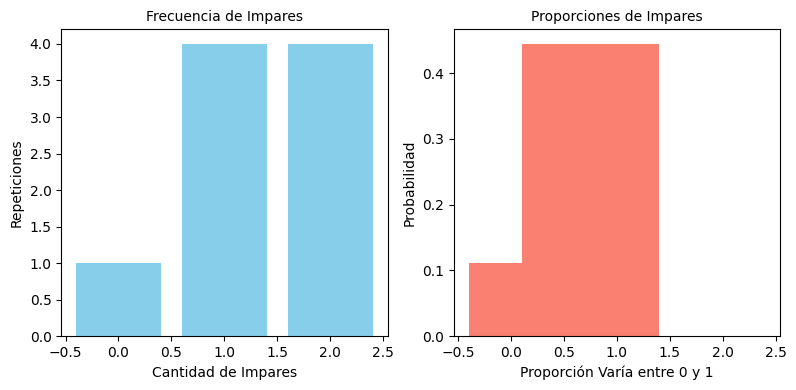

In [18]:

# b. Plotting the histograms
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

# First subplot for count
axes[0].bar(grouped_df['#odds'], grouped_df['#rep'], color='skyblue')
axes[0].set_ylabel('Repeticiones')
axes[0].set_xlabel('Cantidad de Impares',fontsize=10)
axes[0].set_title('Frecuencia de Impares', fontsize=10)

# Second subplot for percentage
axes[1].bar(grouped_df['#odds/t_odds'], grouped_df['#odds/samples'], color='salmon')
axes[1].set_ylabel('Probabilidad')
axes[1].set_xlabel('Proporción Varía entre 0 y 1',fontsize=10)
axes[1].set_title('Proporciones de Impares', fontsize=10)

plt.tight_layout()
plt.show()


+ b. Frecuencias de Impares y probabiliddes de impaeres
+ El gráfico de frecuencias nos da las cantidades de impares que pueden encontrarse dentro de la muestra en el total de las muestras.
    + Si miramos la frecuencias vemos:
        + 1/9 veces se no se encontrarán ningun impares
        + 4/9 veces se encontrará 1 solo impares
        + 4/9 veces se encontrarán 2 impares
        + Eje y: Repeticiones o cantidad de veces que se repita la cantidad de impares.
        + Eje x: Cantidad de impares que pueden encontrarse dentro de una muestra.
+ El grafico de proporciones nos da la probabilidad de encontrar una determinada proporción del total de impares dentro del total de las muestras.
    + Si obsevamos las probabilidades vemos:
        + 0.111111 es la probabilidad de encontrar 0 de dos impares dentro de las 9 muestras.
        + 0.444444 es la probabilidad de encontrar 1 de dos impares dentro de las 9 muestras.
        + 0.444444 es la probabilidad de encontrar 2 de dos impares dentro de las 9 muestras.
        + Eje y: La suma de las probabilidaddes da 1 como debe ser.
        + Eje x: La proporción de impares también varía entre 0 y 1 como debe ser.

+ C. ¿La media de la distribución muestral de la proporción de números impares también es igual a 2/3?
    + Calculamos la media
        + 1. sumaproducto de 0, 1 y 2 impares por la probabilidad de encontrar esos impares.
        + 2. dividimos la sumaproducto por la cantidad de muestras.
        + En este caso la media se ve a simple vista porque:
            + recordamos que la media de una distribución es : 𝜇=∑〖[𝑥 . 𝑃(𝑥)]〗
            + en este caso x='#odds/t_odds' y P(x)='#odds/samples'
            + la sumaproducto dará  (0 * 0.11 + 0.5* 0.44 + 1* 0.44) = 0.66

In [19]:
grouped_df

,#odds,#odds/t_odds,#odds/data,#odds/samples,#rep
0,0,0.0,0.000000,0.111111,1
1,1,0.5,0.333333,0.444444,4
2,2,1.0,0.666667,0.444444,4


In [20]:

sumaproducto = (grouped_df['#odds/t_odds']* grouped_df['#odds/samples'])
media_proporcion_de_impares=sumaproducto.sum()
print(f"El producto de la proporción de impares dentro de cada muestra por la probabilidad de obtener esa muestra es:\n{sumaproducto}-")
print(f"La media de la proporción de impares que aparecen en las muestras (#odds/data) es igual a: {media_proporcion_de_impares}.")


El producto de la proporción de impares dentro de cada muestra por la probabilidad de obtener esa muestra es:
0    0.000000
1    0.222222
2    0.444444
dtype: float64-
La media de la proporción de impares que aparecen en las muestras (#odds/data) es igual a: 0.6666666666666666.


#### Conclusiones
1. El la definición de este problema al ver los datos [1, 2, 5] se observa que la proporción de impares es 0.66666 o 2/3.
2. En el punto a, al armar la tabla de datos se observa que la media de las proporcones de impares sobre las muestras es 2/3.
2. En el punto c, se revisa la media de las proporciones y una vez mas se observa que la media de las proporciones es 2/3.
+ Por lo tanto, **las proporciones muestrales tienden a coincidir con la proporción poblacional** 
    + (en lugar de tender sistemáticamente a subestimar o sobreestimar ese valor)


_____________________________________________________________________________________________________________________________________________________________